In [58]:
import PyPDF2
from nltk import word_tokenize 
from nltk.util import ngrams
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from dictionary import *

# filename is test.pdf

In [64]:
def get_text(file):
    pdfFileObj = open(file, 'rb')
    pdfReader = PyPDF2.PdfReader(pdfFileObj)
    text = ''
    num_pages = len(pdfReader.pages)
    for i in range(num_pages):
        pageObj = pdfReader.pages[i]
        text += pageObj.extract_text()
    pdfFileObj.close()
    return text

def get_string_from_list(list):
    string = ''
    for i in range(len(list)):
        string += list[i]
        if i != len(list)-1:
            string += ' '
    return string

def filter(text):
    token = word_tokenize(text)
    token = [word.lower() for word in token]
    token = [word for word in token if word.isalpha()]
    token = [word for word in token if not word in stop_words]
    #join the words per cent in a single word in the list
    for i in range(len(token)):
        if token[i] == 'per' and token[i+1] == 'cent':
            token[i] = 'percent'
            token[i+1] = ''
    # remove empty string
    token = [word for word in token if word != '']
    return token

def get_bigram(token):
    bigram = ngrams(token, 2)
    return list(bigram)

press release department communication central office mumbai reserve bank india website helpdoc april governor statement april monetary policy committee mpc met april deliberated current evolving macroeconomic financial developments domestic global mpc voted unanimously leave policy repo rate unchanged percent also unanimously decided continue accomm odative stance long necessary sustain growth durable basis continue mitigate impact covid economy ensuring inflation remains within target going forward marginal standing facility msf rate th e bank rate remain unchanged percent reverse repo rate stands unchanged percent let start laying briefly mpc decision underlying rationale since last meeting headline inflation moderating close target rate january firmed percent february primarily due adverse base effect looking ahead evolving cpi inflation trajectory likely subjected upside downside pressures bumper foodgr ains production shoul result softening cereal prices going forward mitigati pr

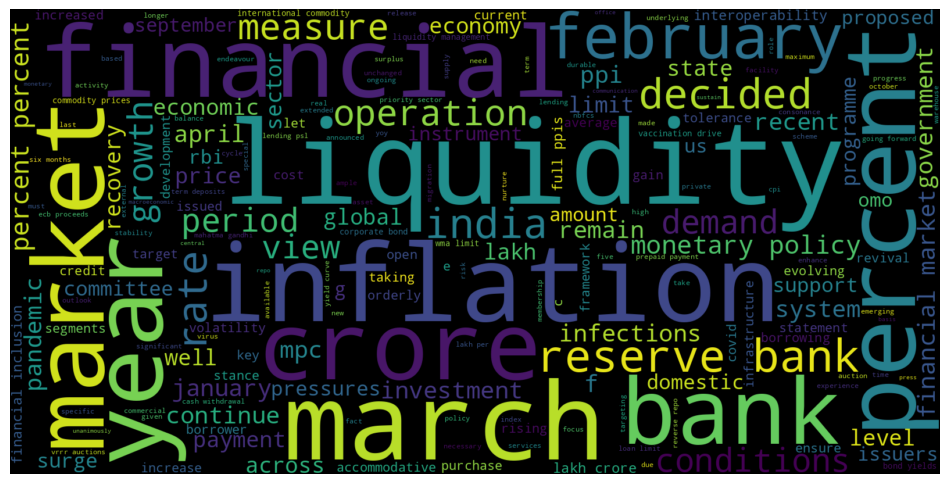

In [68]:
string_list = get_string_from_list(filter(get_text('test.pdf')))
print(string_list)
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(string_list)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()